# Normality of Residuals
Normality of Residuals is another important assumption in linear regression. It implies that the residuals should be normally distributed. In other words, the distribution of the residuals should be approximately normal. Mathematically, $\epsilon ~ N(0, \sigma^2)$ where $\sigma^2$ is the variance of the residuals, 0 refers to the mean, and $  $\epsilon $ is the residual. Thus, in linear regression, the assumption of normality means that for each combination of independent variable values, the residuals should be normally distributed with a mean of zero.

If the residuals are normally distributed then the coefficient estimates will be unbiased and have the minimum variance among all unbiased estimators. Also, the confidence intervals and p-values will be accurate, leading to valid inferences. However, it it noteworthy that the assumption of normality is not required for making predictions. If so then, the obvious question will be why normality of errors is so important?

1. The t-tests for individual regression coefficients (used to test whether the coefficients are significantly different from zero) and F-tests for overall model fit rely on the assumption that errors are normally distributed.

2. When errors are normally distributed, the confidence intervals for the regression coefficients are correctly specified. If the normality assumption is violated, confidence intervals might be too wide or too narrow.

3. Predictions made by the model, especially prediction intervals, assume that errors follow a normal distribution. If errors deviate significantly from normality, the prediction intervals may not capture the true uncertainty.

We can use various techniques to check for normality of errors. Some of the most common techniques are histogram of residuals, Q-Q Plot, Shapiro-Wilk Test, Kolmogorov-Smirnov Test etc.

Let's validate these concepts through codes.

In [1]:
# import required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from scipy import stats

In [2]:
# Prepare toy dataset
np.random.seed(0)
n = 100

# initialize random study hours between 0 and 10
X = np.random.rand(n, 1) * 10 

true_coeff = 3.5
y = true_coeff * X.flatten() + np.random.normal(0, 5, size=n)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predict on test data
y_pred = model.predict(X_test)

# compute residuals
residuals = y_test - y_pred

1. Plot a histogram of residuals to visually inspect normality.

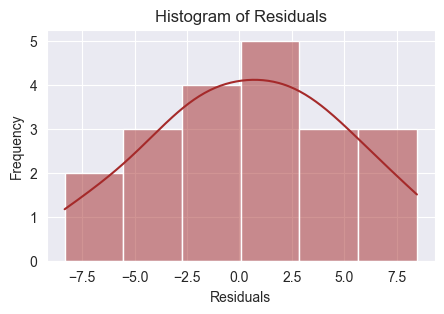

In [6]:
plt.figure(figsize=(5, 3))
sns.histplot(residuals, kde=True, color='brown')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

2. Plot a Q-Q plot of residuals to visually inspect normality.

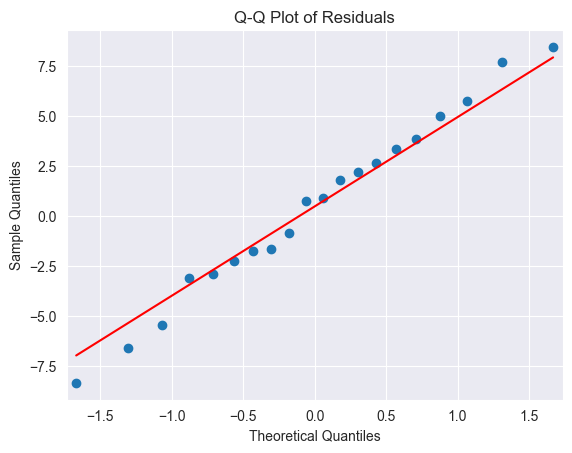

In [10]:
sm.qqplot(residuals, line='s', color='brown')
plt.title('Q-Q Plot of Residuals')
plt.show()

3. Perform Shapiro-Wilk Test for normality of residuals.
Shapiro-Wilk Test for normality of residuals is a statistical test that checks whether a given dataset follows a normal distribution. It tests the null hypothesis that the data is normally distributed. It is one of the most commonly used tests for nom normality.
    
    **Null Hypothesis (H₀)**: The data residuals follow a normal distribution.
    
    **Alternative Hypothesis (H₁)**: The residuals do not follow a normal distribution.

The test statistic of this test is given as:

$$W = \frac{\sqrt{n}}{\sigma} \frac{\sum_{i=1}^n (x_i - \bar{x})}{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2}}$$

where, $n$ is the number of observations, $\sigma$ is the standard deviation of the residuals, and $\bar{x}$ is the mean of the residuals.

The p-value of Shapiro-Wilk test tells us the probability that the data could have been drawn from a normal distribution.


In [12]:
shapiro_statistic = stats.shapiro(residuals)
print("Shapiro-Wilk Test Results:")
print("Test Statistic:", shapiro_statistic.statistic)
print("p-value:", shapiro_statistic.pvalue)

Shapiro-Wilk Test Results:
Test Statistic: 0.9843237619760842
p-value: 0.9771394323190653


Interpretation of Shapiro-Wilk Test
1. P-value
- p > 0.05: Fail to reject H₀. This means the data appears to be normally distributed, as there is not enough evidence to conclude otherwise.
-p ≤ 0.05: Reject H₀. This indicates that the data does not follow a normal distribution.
In simple terms:
- If the p-value is greater than 0.05, we assume the residuals are normally distributed.
- the p-value is less than or equal to 0.05, we conclude that the residuals are not normally distributed.

2. Test Statistic (W):
- W ≈ 1: The closer the test statistic is to 1, the closer the data is to a normal distribution.
- W < 1: Values further from 1 indicate deviations from normality.

Interpreting the above results, the p-value is 0.9771, which is much larger than the conventional significance level of 0.05. This means we fail to reject the null hypothesis. In other words, there is no evidence to suggest that the data (or residuals) deviate significantly from a normal distribution. And, the test statistic, 0.9843, is very close to 1, which indicates that the distribution of the residuals is quite close to a normal distribution.

Thus, we can conclude that our regression model follows a normal distribution.